In [29]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection

#gets rid of wierd warning messages
tf.logging.set_verbosity(tf.logging.ERROR)

#how you set the random seed in tensorflow as opposed to numpy
RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

In [2]:
#Using 3 hidden layers
def forwardprop(X, w_1, w_2, w_3):
    """
    Forward-propagation.
    IMPORTANT: yhat is not softmax since TensorFlow's softmax_cross_entropy_with_logits() does that internally.
    """
    #sigmoid produces new vector of numbers 
    h    = tf.nn.sigmoid(tf.matmul(X, w_1))# The \sigma function
    h2    = tf.nn.sigmoid(tf.matmul(h, w_2))
    #do matrix multiplication 
    yhat = tf.matmul(h2, w_3)  # The \varphi function
    return yhat

In [3]:
#Reading in training features, training labels, and test features
train_features = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv',
                           index_col=[0,1,2])

test_features = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Test_Data_Features.csv',
                           index_col=[0,1,2])


In [4]:
#Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

#Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

#test data for sj
sj_test_features = test_features.loc['sj']

#test data for iq
iq_test_features = test_features.loc['iq']

In [5]:
#Fill NA/NaN values using the specified method
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)
iq_test_features.fillna(method='ffill', inplace=True)
sj_test_features.fillna(method='ffill', inplace=True)

/Users/hannahsaghir/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [6]:
#Creating X and y values for sj and iq that will be trained
X_sj = sj_train_features[["precipitation_amt_mm", "station_avg_temp_c", 'ndvi_ne', 'ndvi_nw', 'ndvi_se']]
y_sj = sj_train_labels['total_cases']
X_iq = iq_train_features[['precipitation_amt_mm', 'station_avg_temp_c', 'ndvi_ne', 'ndvi_nw', 'ndvi_se']]
y_iq = iq_train_labels['total_cases']

#test X and y values
X_sj_tests2 = sj_test_features[["precipitation_amt_mm", "station_avg_temp_c", 'ndvi_ne', 'ndvi_nw', 'ndvi_se']]

X_iq_tests2 = iq_test_features[["precipitation_amt_mm", "station_avg_temp_c", 'ndvi_ne', 'ndvi_nw', 'ndvi_se']]

In [7]:
#training iq data
X_iq_test = X_iq[-100:] #Last 100 items
X_iq_train = X_iq[:-100] #First 100 items

y_iq_test = y_iq[-100:]
y_iq_train = y_iq[:-100]

y_iq_train = y_iq_train.reshape((-1,1))
y_iq_test = y_iq_test.reshape((-1,1))

#training sj data
X_sj_test = X_sj[-100:]
X_sj_train = X_sj[:-100]

y_sj_test = y_sj[-100:]
y_sj_train = y_sj[:-100]

y_sj_train = y_sj_train.reshape((-1,1))
y_sj_test = y_sj_test.reshape((-1,1))


/Users/hannahsaghir/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/hannahsaghir/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/hannahsaghir/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/hannahsaghir/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [8]:
# Layer's sizes
x_size = X_iq_train.shape[1]   # Number of input nodes: 4 features and 1 bias
h_size = 32              # Number of hidden nodes in the middle which is up to us
y_size = 1   # Number of outcomes (3 iris flowers)

# Layer's sizes
x_size = X_sj_train.shape[1]   # Number of input nodes: 4 features and 1 bias
h_size = 256             # Number of hidden nodes in the middle which is up to us
y_size = 1   # Number of outcomes (3 iris flowers)

In [9]:
# Symbols iq
X_iq = tf.placeholder("float", shape=[None, x_size])
y_iq = tf.placeholder("float", shape=[None, y_size])

# Symbols sj
X_sj = tf.placeholder("float", shape=[None, x_size])
y_sj = tf.placeholder("float", shape=[None, y_size])

In [10]:
# Weight initializations to create two varibles to train and do multiplication with
w_1iq = init_weights((x_size, h_size))
w_2iq = init_weights((h_size, h_size))
w_3iq = init_weights((h_size, y_size))

w_1sj = init_weights((x_size, h_size))
w_2sj = init_weights((h_size, h_size))
w_3sj = init_weights((h_size, y_size))

In [11]:
# Forward propagation
#takes input and two sets of weights
yhat_iq   = forwardprop(X_iq, w_1iq, w_2iq, w_3iq)
yhat_sj    = forwardprop(X_sj, w_1sj, w_2sj, w_3sj)
predict_iq = tf.to_int64(yhat_iq)
predict_sj = tf.to_int64(yhat_sj)

In [12]:
# Backward propagation
#the one loss function you always use when making classifications with tf
cost_iq    = tf.losses.mean_squared_error(labels=y_iq, predictions=yhat_iq)
#train op we saw on slides to minimize cost 
updates_iq = tf.train.GradientDescentOptimizer(0.0000003).minimize(cost_iq)


# Backward propagation
#the one loss function you always use when making classifications with tf
cost_sj   = tf.losses.mean_squared_error(labels=y_sj, predictions=yhat_sj)
#train op we saw on slides to minimize cost 
updates_sj = tf.train.GradientDescentOptimizer(0.0000003).minimize(cost_sj)


In [13]:
# Run SGD
#everytime you create session you need to run that line of code 
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [14]:
#100 gradient descent updates and run batches of size one; example at a time 

#for iq
for epoch in range(100):
        # Train with each example
        for i in range(len(X_iq_train)):
            sess.run(updates_iq, feed_dict={X_iq: X_iq_train[i: i + 1], y_iq: y_iq_train[i: i + 1]})
            
        train_accuracy = mean_absolute_error(y_iq_train,
                                 sess.run(predict_iq, feed_dict={X_iq: X_iq_train}))
        test_accuracy  = mean_absolute_error(y_iq_test,
                                 sess.run(predict_iq, feed_dict={X_iq: X_iq_test}))
#printing out accuracy
        print("Epoch = %d, train accuracy = %.2f, test accuracy = %.2f"
              % (epoch + 1,  train_accuracy, test_accuracy))
    

Epoch = 1, train accuracy = 7.03, test accuracy = 9.83
Epoch = 2, train accuracy = 7.01, test accuracy = 9.83
Epoch = 3, train accuracy = 6.98, test accuracy = 9.73
Epoch = 4, train accuracy = 6.88, test accuracy = 9.55
Epoch = 5, train accuracy = 6.45, test accuracy = 8.97
Epoch = 6, train accuracy = 6.45, test accuracy = 8.97
Epoch = 7, train accuracy = 6.45, test accuracy = 8.97
Epoch = 8, train accuracy = 6.45, test accuracy = 8.97
Epoch = 9, train accuracy = 6.45, test accuracy = 8.97
Epoch = 10, train accuracy = 6.44, test accuracy = 8.89
Epoch = 11, train accuracy = 6.39, test accuracy = 8.80
Epoch = 12, train accuracy = 6.07, test accuracy = 8.27
Epoch = 13, train accuracy = 6.06, test accuracy = 8.27
Epoch = 14, train accuracy = 6.06, test accuracy = 8.27
Epoch = 15, train accuracy = 6.06, test accuracy = 8.27
Epoch = 16, train accuracy = 6.06, test accuracy = 8.27
Epoch = 17, train accuracy = 6.06, test accuracy = 8.27
Epoch = 18, train accuracy = 6.06, test accuracy = 8.27
E

In [15]:
#100 gradient descent updates and run batches of size one; example at a time 

#for sj
for epoch in range(100):
        # Train with each example
        for i in range(len(X_sj_train)):
            sess.run(updates_sj, feed_dict={X_sj: X_sj_train[i: i + 1], y_sj: y_sj_train[i: i + 1]})
            
        train_accuracy = mean_absolute_error(y_sj_train,
                                 sess.run(predict_sj, feed_dict={X_sj: X_sj_train}))
        test_accuracy  = mean_absolute_error(y_sj_test,
                                 sess.run(predict_sj, feed_dict={X_sj: X_sj_test}))
#printing out accuracy
        print("Epoch = %d, train accuracy = %.2f, test accuracy = %.2f"
              % (epoch + 1,  train_accuracy, test_accuracy))


Epoch = 1, train accuracy = 33.33, test accuracy = 22.95
Epoch = 2, train accuracy = 32.41, test accuracy = 22.05
Epoch = 3, train accuracy = 31.08, test accuracy = 20.73
Epoch = 4, train accuracy = 30.04, test accuracy = 19.83
Epoch = 5, train accuracy = 29.38, test accuracy = 19.23
Epoch = 6, train accuracy = 28.53, test accuracy = 18.36
Epoch = 7, train accuracy = 27.93, test accuracy = 17.76
Epoch = 8, train accuracy = 27.46, test accuracy = 17.37
Epoch = 9, train accuracy = 26.95, test accuracy = 17.15
Epoch = 10, train accuracy = 26.60, test accuracy = 16.97
Epoch = 11, train accuracy = 26.20, test accuracy = 16.81
Epoch = 12, train accuracy = 25.93, test accuracy = 16.87
Epoch = 13, train accuracy = 25.74, test accuracy = 16.99
Epoch = 14, train accuracy = 25.59, test accuracy = 17.21
Epoch = 15, train accuracy = 25.52, test accuracy = 17.53
Epoch = 16, train accuracy = 25.48, test accuracy = 17.58
Epoch = 17, train accuracy = 25.48, test accuracy = 17.93
Epoch = 18, train accur

In [17]:
#Creating dictionary with final predictions
final_predict_sj = sess.run(predict_sj, feed_dict={X_sj: X_sj_tests2})

final_predict_iq = sess.run(predict_iq, feed_dict={X_iq: X_iq_tests2})

In [18]:
#Creating file with test cases to be tested
submission = pd.read_csv("DengAI_Predicting_Disease_Spread_-_Submission_Format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([final_predict_sj, final_predict_iq])
submission.to_csv("version6withtf.csv")

                week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18                         12.42             297.572857   
     19                         22.82             298.211429   
     20                         34.54             298.781429   
     21                         15.36             298.987143   
     22                          7.52             299.518571   

                 reanalys

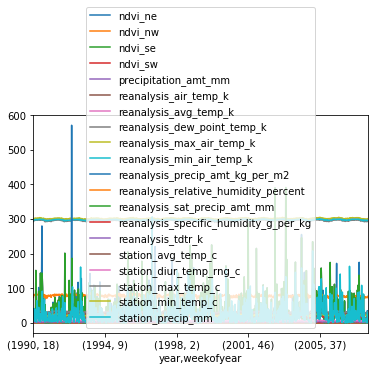

In [19]:
from pandas import Series
from matplotlib import pyplot
print(sj_train_features.head())
sj_train_features.plot()
pyplot.show()

                week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
2000 26              2000-07-01  0.192886  0.132257  0.340886  0.247200   
     27              2000-07-08  0.216833  0.276100  0.289457  0.241657   
     28              2000-07-15  0.176757  0.173129  0.204114  0.128014   
     29              2000-07-22  0.227729  0.145429  0.254200  0.200314   
     30              2000-07-29  0.328643  0.322129  0.254371  0.361043   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
2000 26                         25.41             296.740000   
     27                         60.61             296.634286   
     28                         55.52             296.415714   
     29                          5.60             295.357143   
     30                         62.76             296.432857   

                 reanalys

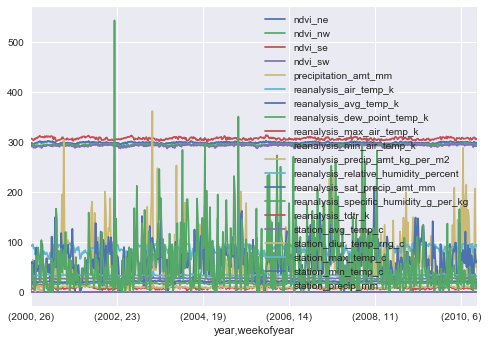

In [28]:
from pandas import Series
from matplotlib import pyplot
print(iq_train_features.head())
iq_train_features.plot()
pyplot.show()

In [20]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm



/Users/hannahsaghir/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Users/hannahsaghir/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AttributeError: 'Tensor' object has no attribute 'fitted'

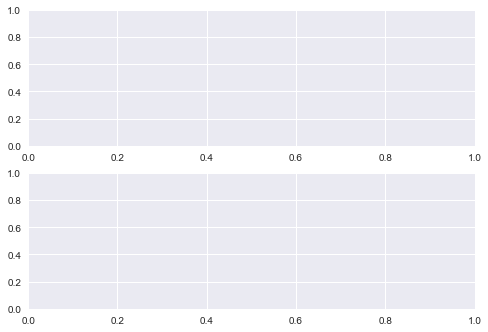

In [30]:
#Attempt to plot actual vs. predicted 

figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_train_features['fitted'] = predict_sj
predict_sj.fitted.plot(ax=axes[0], label="Predictions")
sj_train_features.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_train_features['fitted'] = predict_iq
predict_iq.fitted.plot(ax=axes[1], label="Predictions")
iq_train_features.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()